<a href="https://colab.research.google.com/github/saifulrijal-ds/dicoding-ml-untuk-pemula/blob/main/messy_room_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import os

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
base_dir = '/content/drive/My Drive/Image Classification with Deep Learning/data/messy-vs-clean-room/images'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir(train_dir)

['clean', 'messy']

In [5]:
os.listdir(val_dir)

['messy', 'clean']

In [6]:
train_clean_dir = os.path.join(train_dir, 'clean')
train_messy_dir = os.path.join(train_dir, 'messy')

val_clean_dir = os.path.join(val_dir, 'clean')
val_messy_dir = os.path.join(val_dir, 'messy')

In [10]:
# Pra-pemrosesan dengan mennggunakan ImageDataGenerator
# berfungsi utama melakukan augmentasi pada gambar
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [11]:
train_generator = train_datagen.flow_from_directory( 
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory( 
    val_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [12]:
# mendefinisikan dan menyusun CNN model
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=val_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 49s - loss: 0.7495 - accuracy: 0.4400 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 19s - loss: 0.6905 - accuracy: 0.5500 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 13s - loss: 0.6740 - accuracy: 0.5300 - val_loss: 0.7277 - val_accuracy: 0.5500
Epoch 4/20
25/25 - 8s - loss: 0.7056 - accuracy: 0.5700 - val_loss: 0.6331 - val_accuracy: 0.8000
Epoch 5/20
25/25 - 7s - loss: 0.6541 - accuracy: 0.6900 - val_loss: 0.6746 - val_accuracy: 0.5500
Epoch 6/20
25/25 - 7s - loss: 0.7286 - accuracy: 0.5700 - val_loss: 0.6852 - val_accuracy: 0.6500
Epoch 7/20
25/25 - 6s - loss: 0.6593 - accuracy: 0.6300 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 6s - loss: 0.6660 - accuracy: 0.6000 - val_loss: 0.5786 - val_accuracy: 0.7000
Epoch 9/20
25/25 - 6s - loss: 0.6844 - accuracy: 0.5800 - val_loss: 0.6734 - val_accuracy: 0.6500
Epoch 10/20
25/25 - 6s - loss: 0.6385 - accuracy: 0.7000 - val_loss: 0.5261 - val_accuracy: 0.7000
Epoch 11/20
25/2

In [14]:
test_image_dir = '/content/drive/My Drive/Image Classification with Deep Learning/data/messy-vs-clean-room/images/test/0.png'

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
%matplotlib inline

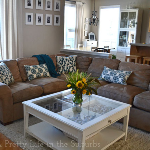

clean


In [20]:
img = load_img(test_image_dir, target_size=(150, 150))
display(img)
img_array = img_to_array(img)
x = np.expand_dims(img_array, axis=0)
classes = model.predict(x)
if classes==0 :
  print('clean')
else:
  print('messy')